In [4]:
import requests
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import scipy
from scipy.stats import ks_1samp, gaussian_kde, norm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

## Choose and describe a protocol:
- protocol link
- defillama link
- protocol type
- key metrics for a protocol
- native token
- other info

In [5]:
def KS_test(sample1, dist = scipy.stats.norm, ax=None, labels=['sample1', 'Norm']):
    """
    Tests the hypothesis that two samples are generated from the same distribution.
    Plots the empirical cdfs and kernel density estimator of pdfs.
    """
    ecdf1 = ECDF(sample1)

    kde1 = gaussian_kde(sample1)

    mean_ = sample1.mean()
    std_ = sample1.std()

    x = np.linspace(np.percentile(sample1, 1),
                    np.percentile(sample1, 99),
                    1000)

    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    ax[0].set_title("Empirical cdfs")
    ax[0].plot(x, ecdf1(x), 'b', label=labels[0])
    ax[0].plot(x, dist.cdf(x, mean_, std_ ), 'g', label=labels[1])
    ax[0].grid('on')
    ax[0].legend()

    ax[1].set_title("KDE of pdfs")
    ax[1].plot(x, kde1(x), 'b', label=labels[0])
    ax[1].plot(x, dist.pdf(x, mean_, std_ ), 'g', label=labels[1])
    ax[1].grid('on')
    ax[1].legend()
    
    return ks_1samp(sample1, dist.cdf)

# UNI Prices

In [17]:
request_url = "https://api.coingecko.com/api/v3/coins/uniswap/market_chart?vs_currency=usd&days=max&interval=daily"
data = requests.get(request_url).json()


In [18]:
items = []
for (p, mc, tv) in zip(data['prices'], data['market_caps'], data['total_volumes']):
    item = [p[0], p[1], mc[1], tv[1]]
    items.append(item)

df = pd.DataFrame(items)

In [19]:
df.columns = ['ts', 'prices', 'market_caps', 'total_volumes']
df['date'] = df.ts.apply(lambda x: datetime.utcfromtimestamp(x//1000))
df.drop(['ts'], axis = 1, inplace = True)
df.set_index('date', inplace = True)

## Load and visualize protocol's data


In [20]:
df

,prices,market_caps,total_volumes
date,,,
2020-09-17 00:00:00,3.443832,2.199132e+08,1.802085e+09
2020-09-18 00:00:00,3.443832,2.199132e+08,1.802085e+09
2020-09-19 00:00:00,7.097694,7.328221e+08,5.688408e+09
2020-09-20 00:00:00,5.702061,6.472084e+08,2.050756e+09
2020-09-21 00:00:00,5.256579,6.324213e+08,1.316669e+09
...,...,...,...
2023-10-24 00:00:00,4.365628,3.285136e+09,2.280844e+08
2023-10-25 00:00:00,4.217180,3.182370e+09,3.566766e+08
2023-10-26 00:00:00,4.169996,3.139676e+09,2.190754e+08


In [21]:
df.describe()

,prices,market_caps,total_volumes
count,1137.000000,1.137000e+03,1.137000e+03
mean,11.896186,6.176629e+09,3.561238e+08
std,9.466788,4.716839e+09,4.718757e+08
min,1.928177,2.199132e+08,2.183570e+07
25%,5.268842,3.320906e+09,1.031560e+08
50%,6.640459,4.518519e+09,1.871456e+08
75%,18.617033,8.254251e+09,3.836141e+08
max,42.884097,2.253105e+10,5.688408e+09


In [22]:
df[df.index > '2023-01-01'].describe()

,prices,market_caps,total_volumes
count,300.000000,3.000000e+02,3.000000e+02
mean,5.460288,4.115166e+09,9.207330e+07
std,0.875032,6.598264e+08,5.119131e+07
min,3.886906,2.931614e+09,2.183570e+07
25%,4.655414,3.509825e+09,5.848950e+07
50%,5.463363,4.115147e+09,8.144155e+07
75%,6.161046,4.643023e+09,1.079127e+08
max,7.343616,5.537167e+09,3.566766e+08


C:\Users\mans\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



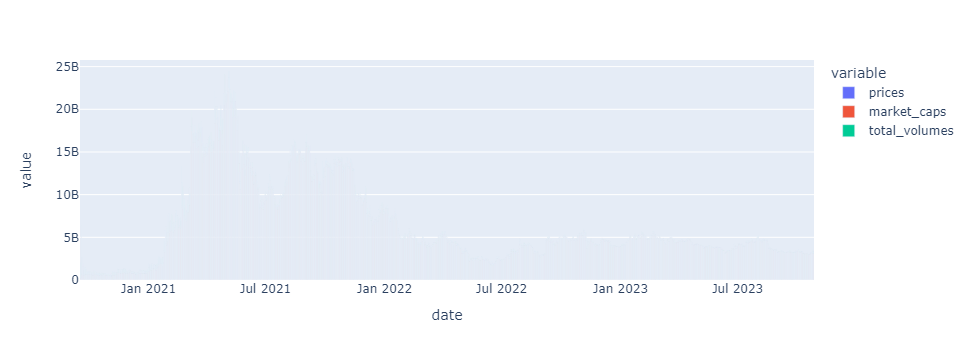

In [23]:

px.bar(df)

Цена на коин со временем снижается

Не смог найти разделение total_supply на cex/dex биржи на https://defillama.com и https://www.coingecko.com их нет но нашел обший обьем

Нарисуем cdf и pdf данных  и сравним с нормальным

KstestResult(statistic=0.9874174892066431, pvalue=0.0, statistic_location=2.6704541290239283, statistic_sign=-1)

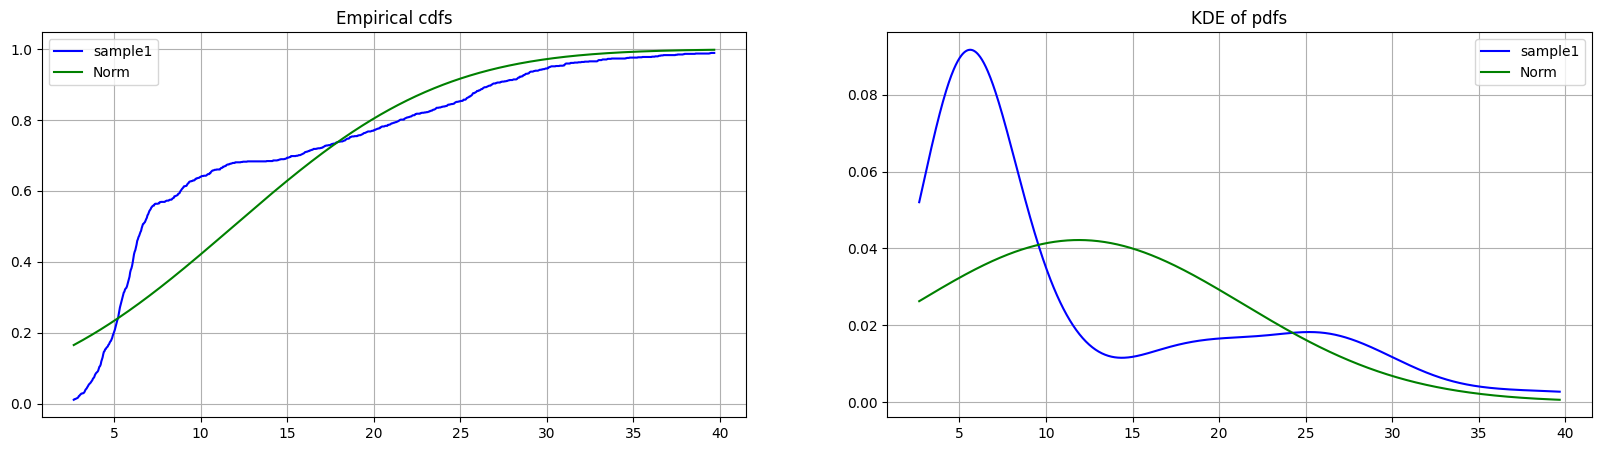

In [24]:
KS_test(df.prices.values, norm)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=219913212.47869825, statistic_sign=-1)

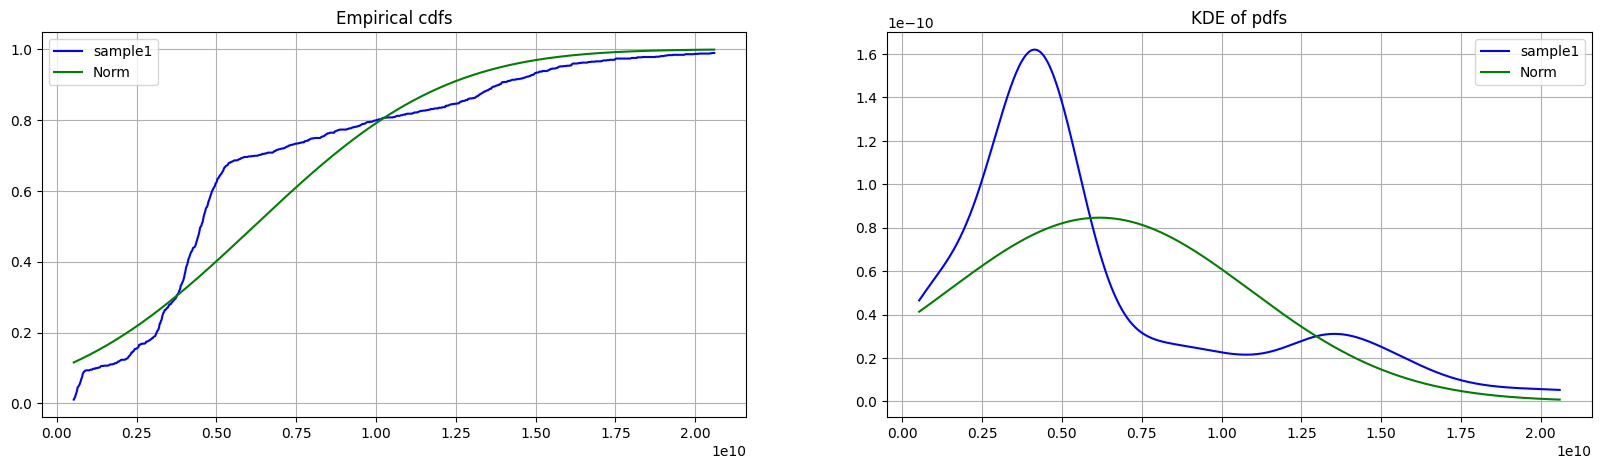

In [25]:
KS_test(df.market_caps.values, norm)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=21835695.967822205, statistic_sign=-1)

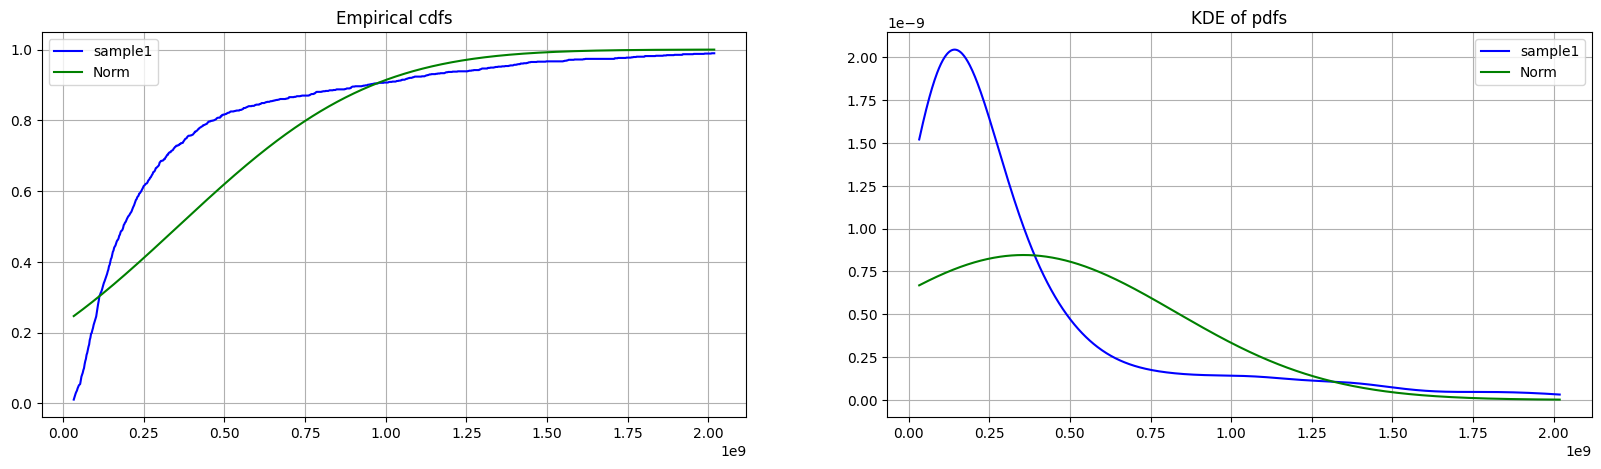

In [26]:
KS_test(df.total_volumes.values, norm)

ничего нормального нет :(

#UNI total supply

In [27]:
request_url = "https://api.coingecko.com/api/v3/coins/uniswap"
data = requests.get(request_url).json()

In [28]:
data['market_data']['total_supply']

1000000000.0

In [30]:
data['market_data']['max_supply']


1000000000.0

Тк total_supply == max_supply значит коиный не "сжигались" => total supply не менялся

## Load and visualize token's data

# UNISWAP TVL

In [31]:
from datetime import datetime
tvls = requests.get('https://api.llama.fi/protocol/uniswap').json()['chainTvls']



TVL = None
for key in tvls.keys():
    tmp = pd.DataFrame(tvls[key]['tvl'])
    
    if TVL is None:
        TVL = tmp
        continue

    TVL = TVL.merge(tmp, on='date', suffixes=('', key), how='outer')
    
TVL['date'] = TVL.date.apply(lambda x: datetime.utcfromtimestamp(x))

In [32]:
TVL.set_index('date', inplace = True)

In [33]:
TVL

,totalLiquidityUSD,totalLiquidityUSDOptimism,totalLiquidityUSDBase,totalLiquidityUSDMoonbeam,totalLiquidityUSDBSC,totalLiquidityUSDAvalanche,totalLiquidityUSDPolygon,totalLiquidityUSDCelo,totalLiquidityUSDArbitrum,totalLiquidityUSDzkSync Era
date,,,,,,,,,,
2018-11-03 00:00:00,3.464389e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-04 00:00:00,4.126818e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-05 00:00:00,4.055178e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-06 00:00:00,4.309134e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-07 00:00:00,1.539794e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-24 00:00:00,2.977358e+09,4.043876e+07,8.911141e+06,57435.57568,1.053632e+07,2.836223e+06,6.955140e+07,1.803669e+07,2.039490e+08,580990.54027
2023-10-25 00:00:00,2.968830e+09,3.956456e+07,9.209166e+06,58684.44680,1.062226e+07,2.804585e+06,7.014695e+07,1.827363e+07,1.991408e+08,584081.01799
2023-10-26 00:00:00,2.975262e+09,3.996063e+07,9.152793e+06,59551.69223,1.054558e+07,2.899886e+06,7.087222e+07,1.848991e+07,2.045739e+08,580222.02616


In [34]:
TVL.describe()

,totalLiquidityUSD,totalLiquidityUSDOptimism,totalLiquidityUSDBase,totalLiquidityUSDMoonbeam,totalLiquidityUSDBSC,totalLiquidityUSDAvalanche,totalLiquidityUSDPolygon,totalLiquidityUSDCelo,totalLiquidityUSDArbitrum,totalLiquidityUSDzkSync Era
count,1.821000e+03,7.120000e+02,7.900000e+01,30.000000,2.240000e+02,1.040000e+02,6.740000e+02,4.740000e+02,7.840000e+02,22.000000
mean,3.151836e+09,4.767686e+07,1.080088e+07,50182.944976,1.364381e+07,2.768474e+06,8.298339e+07,5.639404e+06,1.240504e+08,523339.380107
std,2.923150e+09,1.358691e+07,4.998988e+06,8934.542873,2.594768e+06,2.635664e+05,1.920919e+07,5.941390e+06,9.326315e+07,59934.701739
min,3.464389e+04,9.627025e+06,5.546603e+05,17212.798660,4.350996e+06,2.380901e+06,1.656287e+03,2.772709e+04,1.757643e+06,431862.068090
25%,3.631435e+07,3.903962e+07,8.663425e+06,50940.743537,1.118920e+07,2.511926e+06,6.960212e+07,1.106816e+06,6.007160e+07,453734.953987
50%,3.259672e+09,4.633911e+07,1.028877e+07,52205.585215,1.437170e+07,2.766590e+06,8.584577e+07,1.544155e+06,7.486441e+07,540337.028305
75%,5.284073e+09,5.389426e+07,1.349043e+07,54369.624190,1.500701e+07,2.905674e+06,9.646993e+07,9.474296e+06,1.922028e+08,577106.728283
max,1.024044e+10,8.830854e+07,2.058497e+07,59551.692230,2.009699e+07,3.417974e+06,1.247007e+08,1.848991e+07,3.278352e+08,596890.264700


In [35]:
TVL[TVL.index > '2023-01-01'].describe()

,totalLiquidityUSD,totalLiquidityUSDOptimism,totalLiquidityUSDBase,totalLiquidityUSDMoonbeam,totalLiquidityUSDBSC,totalLiquidityUSDAvalanche,totalLiquidityUSDPolygon,totalLiquidityUSDCelo,totalLiquidityUSDArbitrum,totalLiquidityUSDzkSync Era
count,3.000000e+02,2.970000e+02,7.900000e+01,30.000000,2.240000e+02,1.040000e+02,2.970000e+02,2.970000e+02,2.970000e+02,22.000000
mean,3.339421e+09,5.634458e+07,1.080088e+07,50182.944976,1.364381e+07,2.768474e+06,8.968946e+07,8.388789e+06,2.252540e+08,523339.380107
std,3.882443e+08,1.367273e+07,4.998988e+06,8934.542873,2.594768e+06,2.635664e+05,1.276864e+07,6.005710e+06,7.789579e+07,59934.701739
min,1.138365e+09,3.730616e+07,5.546603e+05,17212.798660,4.350996e+06,2.380901e+06,6.571157e+07,1.114066e+06,7.550762e+07,431862.068090
25%,3.106778e+09,4.472094e+07,8.663425e+06,50940.743537,1.118920e+07,2.511926e+06,7.929798e+07,1.628127e+06,1.693393e+08,453734.953987
50%,3.434042e+09,5.503856e+07,1.028877e+07,52205.585215,1.437170e+07,2.766590e+06,9.341272e+07,8.912674e+06,2.295028e+08,540337.028305
75%,3.602239e+09,6.672100e+07,1.349043e+07,54369.624190,1.500701e+07,2.905674e+06,9.845670e+07,1.539734e+07,2.972176e+08,577106.728283
max,3.913966e+09,8.830854e+07,2.058497e+07,59551.692230,2.009699e+07,3.417974e+06,1.160472e+08,1.848991e+07,3.278352e+08,596890.264700


C:\Users\mans\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



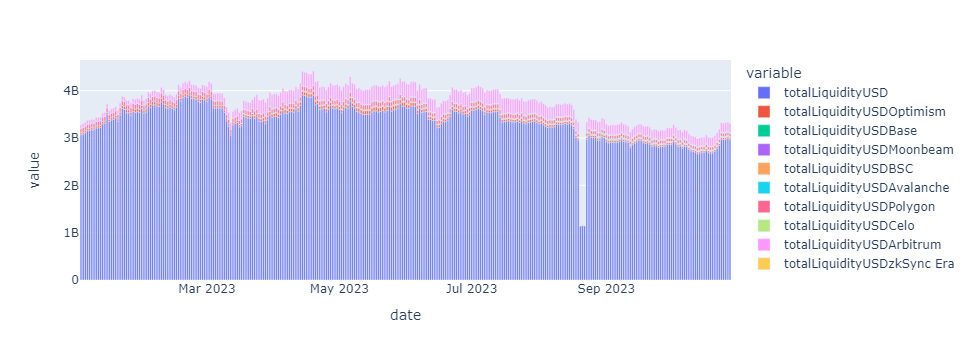

In [36]:
px.bar(TVL[TVL.index > '2023-01-01'])

Нарисуем cdf и pdf данных  и сравним с нормальным

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=34643.89061, statistic_sign=-1)

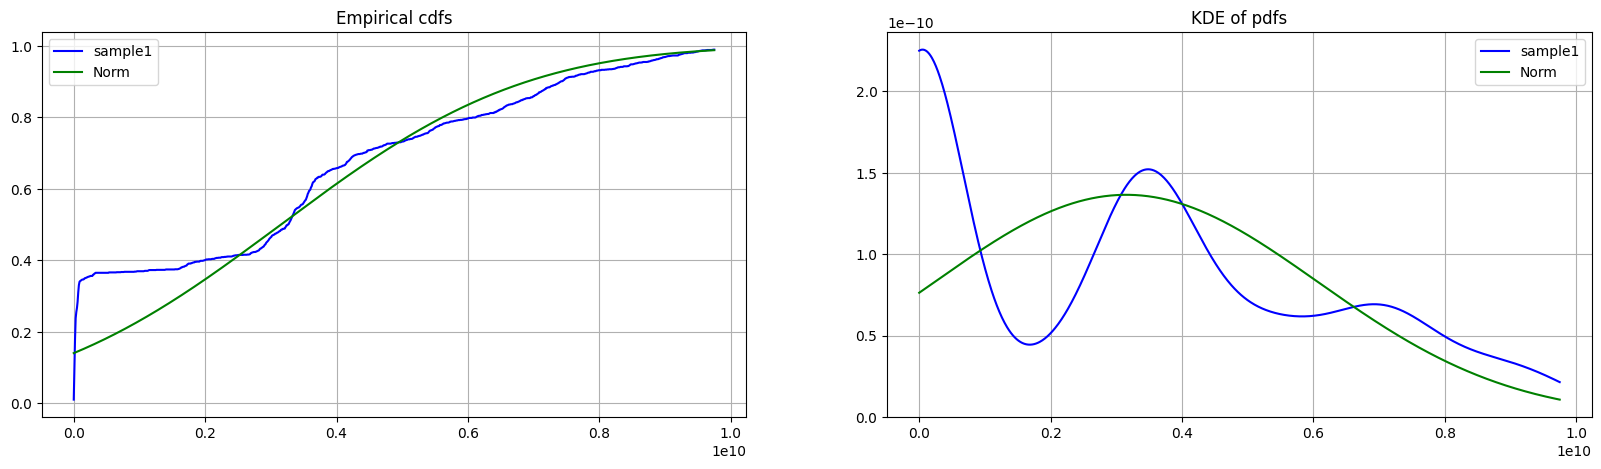

In [37]:
KS_test(TVL['totalLiquidityUSD'], norm)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1757642.75215, statistic_sign=-1)

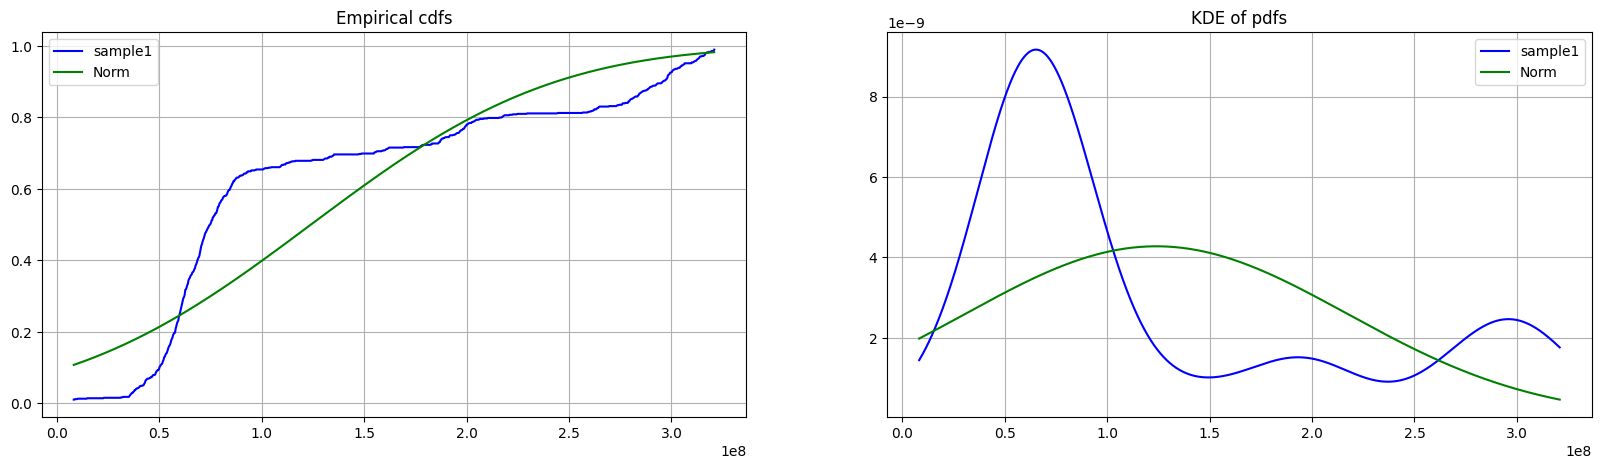

In [38]:
KS_test(TVL['totalLiquidityUSDArbitrum'].dropna(), norm)

# Uniswap_v1 TVL


In [41]:
from datetime import datetime
tvls = requests.get('https://api.llama.fi/protocol/uniswap-v1').json()['chainTvls']




TVL_v1 = None
for key in tvls.keys():
    tmp = pd.DataFrame(tvls[key]['tvl'])
    
    if TVL_v1 is None:
        TVL_v1 = tmp
        continue

    TVL_v1 = TVL_v1.merge(tmp, on='date', suffixes=('', key), how='outer')
    
TVL_v1['date'] = TVL_v1.date.apply(lambda x: datetime.utcfromtimestamp(x))

In [42]:
TVL_v1.set_index('date', inplace = True)

In [43]:
TVL_v1

,totalLiquidityUSD
date,
2018-11-03 00:00:00,3.464389e+04
2018-11-04 00:00:00,4.126818e+04
2018-11-05 00:00:00,4.055178e+04
2018-11-06 00:00:00,4.309134e+04
2018-11-07 00:00:00,1.539794e+05
...,...
2023-10-24 00:00:00,8.105625e+06
2023-10-25 00:00:00,8.129732e+06
2023-10-26 00:00:00,8.111389e+06


In [44]:
TVL_v1.describe()

,totalLiquidityUSD
count,1.821000e+03
mean,1.478562e+07
std,1.350440e+07
min,3.464389e+04
25%,7.856238e+06
50%,1.017323e+07
75%,1.601678e+07
max,8.302581e+07


In [45]:
TVL_v1[TVL_v1.index > '2023-01-01'].describe()

,totalLiquidityUSD
count,6.650000e+02
mean,9.024452e+06
std,1.888061e+06
min,7.282485e+06
25%,7.835475e+06
50%,8.212170e+06
75%,9.007545e+06
max,1.526869e+07


C:\Users\mans\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



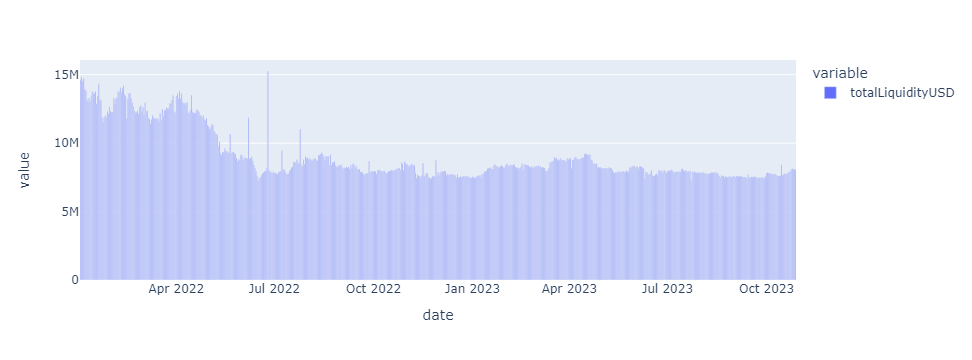

In [46]:
px.bar(TVL_v1[TVL_v1.index > '2023-01-01'])

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=34643.89061, statistic_sign=-1)

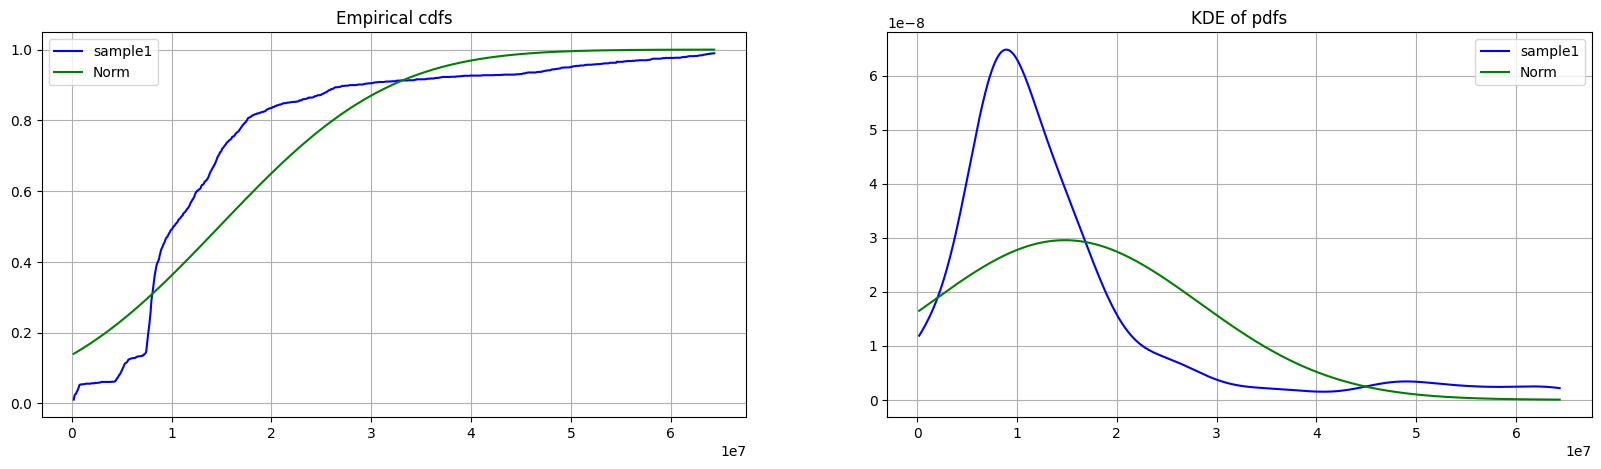

In [47]:
KS_test(TVL_v1['totalLiquidityUSD'], norm)

# Uniswap_v2 TVl

In [48]:
from datetime import datetime
tvls = requests.get('https://api.llama.fi/protocol/uniswap-v2').json()['chainTvls']




TVL_v2 = None
for key in tvls.keys():
    tmp = pd.DataFrame(tvls[key]['tvl'])
    
    if TVL_v2 is None:
        TVL_v2 = tmp
        continue

    TVL_v2 = TVL_v2.merge(tmp, on='date', suffixes=('', key), how='outer')
    
TVL_v2['date'] = TVL_v2.date.apply(lambda x: datetime.utcfromtimestamp(x))

In [49]:
TVL_v2.set_index('date', inplace = True)

In [50]:
TVL_v2

,totalLiquidityUSD
date,
2020-05-06 00:00:00,9.899200e-01
2020-05-07 00:00:00,3.184090e+00
2020-05-08 00:00:00,3.201490e+00
2020-05-09 00:00:00,1.878565e+01
2020-05-10 00:00:00,1.882144e+01
...,...
2023-10-24 00:00:00,1.177156e+09
2023-10-25 00:00:00,1.173358e+09
2023-10-26 00:00:00,1.182784e+09


In [51]:
TVL_v2.describe()

,totalLiquidityUSD
count,1.270000e+03
mean,2.557129e+09
std,2.066180e+09
min,9.899200e-01
25%,1.111537e+09
50%,1.604274e+09
75%,4.163933e+09
max,1.000069e+10


In [52]:
TVL_v2[TVL_v2.index > '2023-01-01'].describe()

,totalLiquidityUSD
count,6.640000e+02
mean,1.577510e+09
std,8.685564e+08
min,8.433011e+08
25%,1.098120e+09
50%,1.181499e+09
75%,1.563349e+09
max,4.759290e+09


C:\Users\mans\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



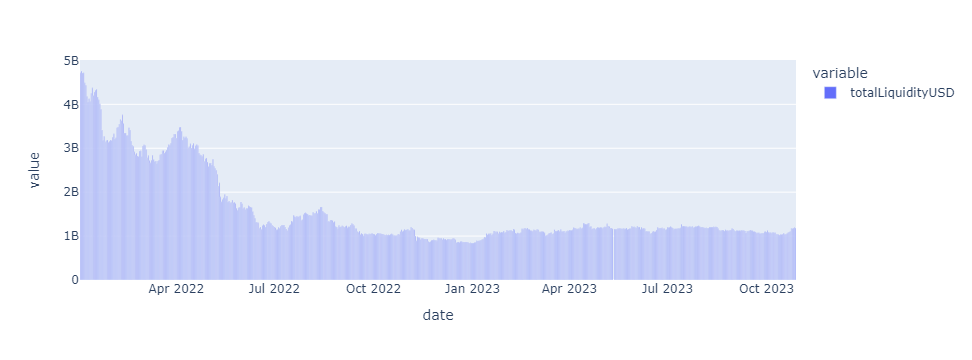

In [53]:
px.bar(TVL_v2[TVL_v2.index > '2023-01-01'])

KstestResult(statistic=0.9984865491419459, pvalue=0.0, statistic_location=3.18409, statistic_sign=-1)

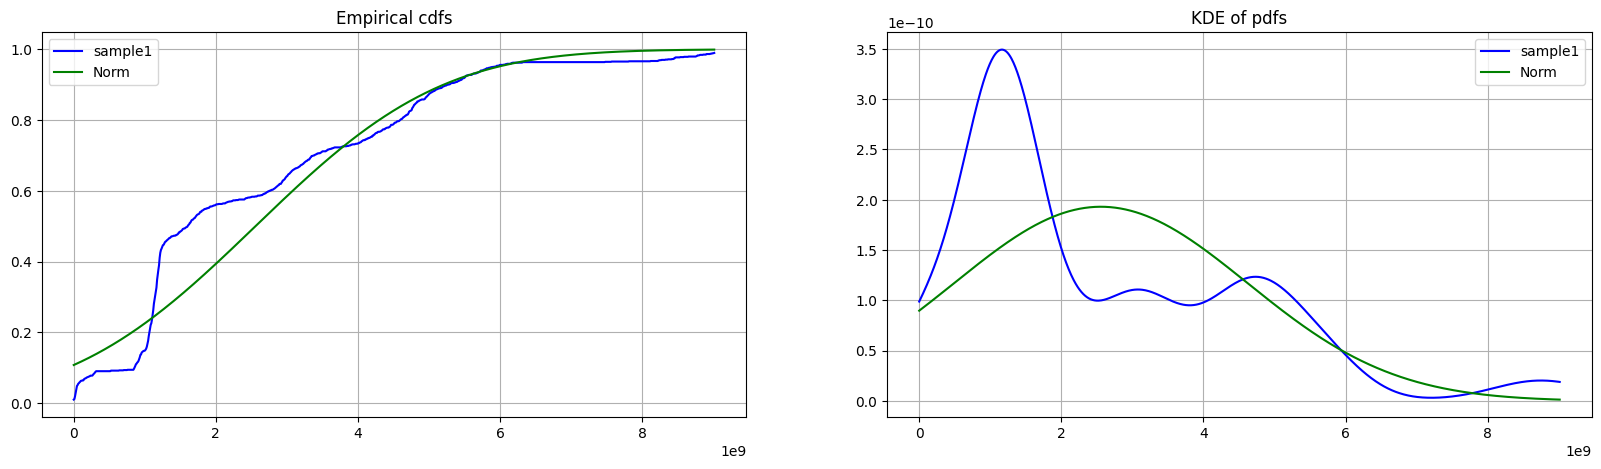

In [54]:
KS_test(TVL_v2['totalLiquidityUSD'], norm)

# Uniswap_V3 TVl

In [57]:
from datetime import datetime
tvls = requests.get('https://api.llama.fi/protocol/uniswap-v3').json()['chainTvls']




TVL_v3 = None
for key in tvls.keys():
    tmp = pd.DataFrame(tvls[key]['tvl'])
    
    if TVL_v3 is None:
        TVL_v3 = tmp
        continue

    TVL_v3 = TVL_v3.merge(tmp, on='date', suffixes=('', key), how='outer')
    
TVL_v3['date'] = TVL_v3.date.apply(lambda x: datetime.utcfromtimestamp(x))

In [58]:
TVL_v3.set_index('date', inplace = True)

In [59]:
TVL_v3

,totalLiquidityUSD,totalLiquidityUSDBase,totalLiquidityUSDMoonbeam,totalLiquidityUSDBinance,totalLiquidityUSDEthereum,totalLiquidityUSDAvalanche,totalLiquidityUSDPolygon,totalLiquidityUSDCelo,totalLiquidityUSDArbitrum,totalLiquidityUSDzkSync Era
date,,,,,,,,,,
2021-11-13,3.904444e+07,NaN,NaN,NaN,3.805057e+09,NaN,NaN,NaN,6.415418e+07,NaN
2021-11-14,3.851921e+07,NaN,NaN,NaN,3.803048e+09,NaN,NaN,NaN,6.303078e+07,NaN
2021-11-15,3.858285e+07,NaN,NaN,NaN,3.819210e+09,NaN,NaN,NaN,6.478571e+07,NaN
2021-11-16,3.801042e+07,NaN,NaN,NaN,3.771110e+09,NaN,NaN,NaN,6.340158e+07,NaN
2021-11-17,3.562659e+07,NaN,NaN,NaN,3.611641e+09,NaN,NaN,NaN,5.948667e+07,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-08,NaN,NaN,NaN,NaN,3.624914e+09,NaN,NaN,NaN,6.017269e+07,NaN
2021-11-09,NaN,NaN,NaN,NaN,3.773584e+09,NaN,NaN,NaN,5.929698e+07,NaN
2021-11-10,NaN,NaN,NaN,NaN,3.764398e+09,NaN,NaN,NaN,5.791270e+07,NaN


In [60]:
TVL_v3.describe()

,totalLiquidityUSD,totalLiquidityUSDBase,totalLiquidityUSDMoonbeam,totalLiquidityUSDBinance,totalLiquidityUSDEthereum,totalLiquidityUSDAvalanche,totalLiquidityUSDPolygon,totalLiquidityUSDCelo,totalLiquidityUSDArbitrum,totalLiquidityUSDzkSync Era
count,7.120000e+02,7.900000e+01,30.000000,2.240000e+02,9.000000e+02,1.040000e+02,6.740000e+02,4.740000e+02,7.840000e+02,22.000000
mean,4.767770e+07,1.080196e+07,50199.487346,1.364422e+07,2.737618e+09,2.768780e+06,8.298402e+07,5.639711e+06,1.240537e+08,523434.029397
std,1.358638e+07,4.998645e+06,8948.288936,2.594645e+06,8.191107e+08,2.636814e+05,1.920876e+07,5.942035e+06,9.326578e+07,60057.902403
min,9.627025e+06,5.546603e+05,17212.798660,4.350996e+06,1.396867e+08,2.380901e+06,1.656287e+03,2.772709e+04,1.757643e+06,431862.068090
25%,3.909551e+07,8.663425e+06,50940.743537,1.118920e+07,2.235867e+09,2.511926e+06,6.965717e+07,1.106816e+06,6.007160e+07,453734.953987
50%,4.633911e+07,1.028877e+07,52205.585215,1.437170e+07,2.574673e+09,2.766590e+06,8.584577e+07,1.544155e+06,7.486441e+07,540337.028305
75%,5.389426e+07,1.349043e+07,54369.624190,1.500701e+07,3.479318e+09,2.905674e+06,9.646993e+07,9.474296e+06,1.922028e+08,577106.728283
max,8.830854e+07,2.058497e+07,59551.692230,2.009699e+07,4.632199e+09,3.417974e+06,1.247007e+08,1.848991e+07,3.278352e+08,598972.549090


In [62]:
TVL_v3[TVL_v3.index > '2023-01-01'].describe()

,totalLiquidityUSD,totalLiquidityUSDBase,totalLiquidityUSDMoonbeam,totalLiquidityUSDBinance,totalLiquidityUSDEthereum,totalLiquidityUSDAvalanche,totalLiquidityUSDPolygon,totalLiquidityUSDCelo,totalLiquidityUSDArbitrum,totalLiquidityUSDzkSync Era
count,2.970000e+02,7.900000e+01,30.000000,2.240000e+02,2.970000e+02,1.040000e+02,2.970000e+02,2.970000e+02,2.970000e+02,22.000000
mean,5.634660e+07,1.080196e+07,50199.487346,1.364422e+07,2.219384e+09,2.768780e+06,8.969088e+07,8.389280e+06,2.252626e+08,523434.029397
std,1.367017e+07,4.998645e+06,8948.288936,2.594645e+06,2.941052e+08,2.636814e+05,1.276644e+07,6.006503e+06,7.789291e+07,60057.902403
min,3.730616e+07,5.546603e+05,17212.798660,4.350996e+06,1.628474e+09,2.380901e+06,6.571157e+07,1.114066e+06,7.550762e+07,431862.068090
25%,4.472094e+07,8.663425e+06,50940.743537,1.118920e+07,2.049624e+09,2.511926e+06,7.929798e+07,1.628127e+06,1.693393e+08,453734.953987
50%,5.503856e+07,1.028877e+07,52205.585215,1.437170e+07,2.313128e+09,2.766590e+06,9.341272e+07,8.912674e+06,2.295028e+08,540337.028305
75%,6.672100e+07,1.349043e+07,54369.624190,1.500701e+07,2.426477e+09,2.905674e+06,9.845670e+07,1.539734e+07,2.972176e+08,577106.728283
max,8.830854e+07,2.058497e+07,59551.692230,2.009699e+07,2.717833e+09,3.417974e+06,1.160472e+08,1.848991e+07,3.278352e+08,598972.549090


C:\Users\mans\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



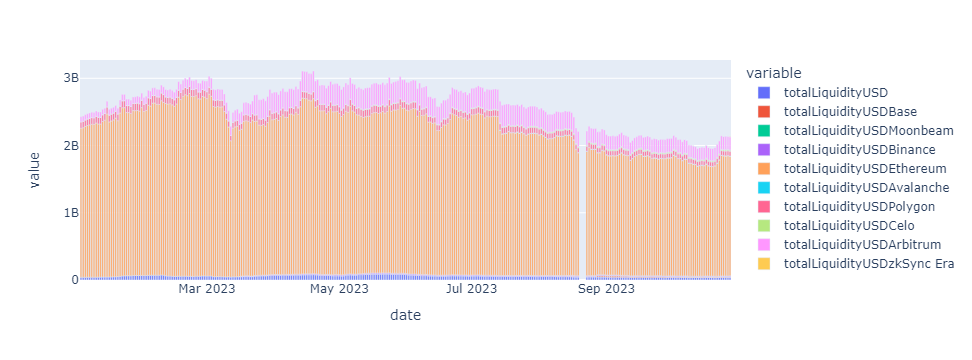

In [63]:
px.bar(TVL_v3[TVL_v3.index > '2023-01-01'])

KstestResult(statistic=1.0, pvalue=0.0)

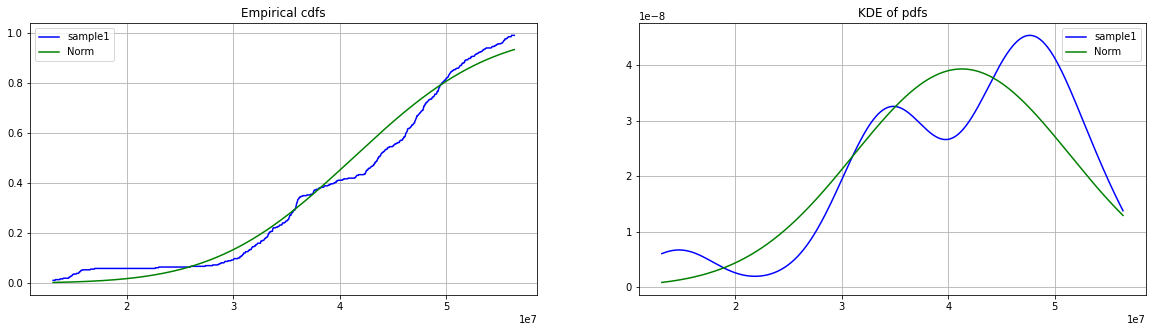

In [50]:
KS_test(TVL_v3['totalLiquidityUSD'].dropna(), norm)

#Uniswap_V3 trading_volumes

In [71]:
request_url = "https://api.coingecko.com/api/v3/exchanges/uniswap_v3/volume_chart?days=1000"
data = requests.get(request_url).json()


In [72]:
uniswap_v3_volume = pd.DataFrame(data, columns = ['date','volumes'])

In [73]:
uniswap_v3_volume['date'] = uniswap_v3_volume.date.apply(lambda x: datetime.utcfromtimestamp(x//1000))
uniswap_v3_volume.set_index('date', inplace = True)

In [74]:
uniswap_v3_volume.volumes = uniswap_v3_volume.volumes.astype(float)

In [75]:
uniswap_v3_volume.describe()

,volumes
count,548.000000
mean,43183.193743
std,39038.292579
min,0.000000
25%,24404.321228
50%,34408.553095
75%,48181.186686
max,358564.136433


In [76]:
uniswap_v3_volume[uniswap_v3_volume.index > '2023-01-01'].describe()

,volumes
count,308.000000
mean,52668.109440
std,45018.100925
min,0.000000
25%,32141.221088
50%,41663.219344
75%,56737.129062
max,358564.136433


In [77]:

px.bar(uniswap_v3_volume[uniswap_v3_volume.index > '2023-01-01'])

KstestResult(statistic=0.9963503649635036, pvalue=0.0)

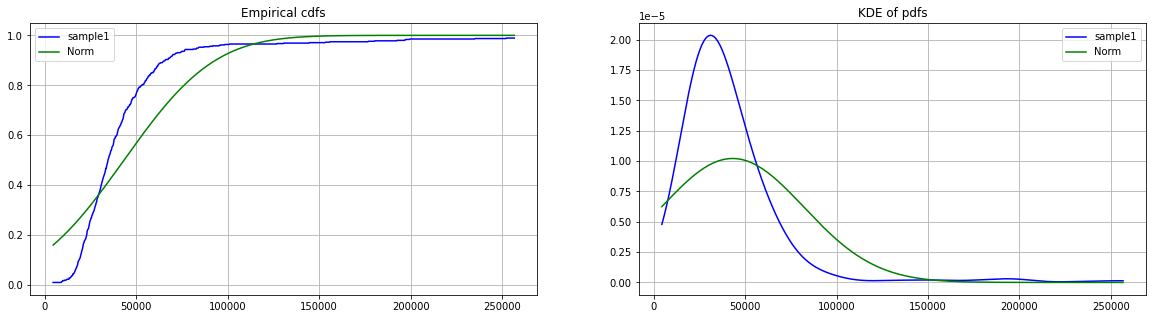

In [79]:
KS_test(uniswap_v3_volume.volumes.dropna(), norm)

#Uniswap_V2 trading_volumes

In [80]:
request_url = "https://api.coingecko.com/api/v3/exchanges/uniswap_v2/volume_chart?days=700"
data = requests.get(request_url).json()


In [81]:
uniswap_v2_volume = pd.DataFrame(data, columns = ['date','volumes'])

In [82]:
uniswap_v2_volume['date'] = uniswap_v2_volume.date.apply(lambda x: datetime.utcfromtimestamp(x//1000))
uniswap_v2_volume.set_index('date', inplace = True)

In [83]:
uniswap_v2_volume.volumes = uniswap_v2_volume.volumes.astype(float)

In [84]:
uniswap_v3_volume.describe()

,volumes
count,548.000000
mean,43183.193743
std,39038.292579
min,0.000000
25%,24404.321228
50%,34408.553095
75%,48181.186686
max,358564.136433


In [85]:
uniswap_v3_volume[uniswap_v3_volume.index > '2023-01-01'].describe()

,volumes
count,308.000000
mean,52668.109440
std,45018.100925
min,0.000000
25%,32141.221088
50%,41663.219344
75%,56737.129062
max,358564.136433


In [86]:
cols = list(df.columns)

px.bar(uniswap_v2_volume[uniswap_v2_volume.index > '2023-01-01'])

KstestResult(statistic=1.0, pvalue=0.0)

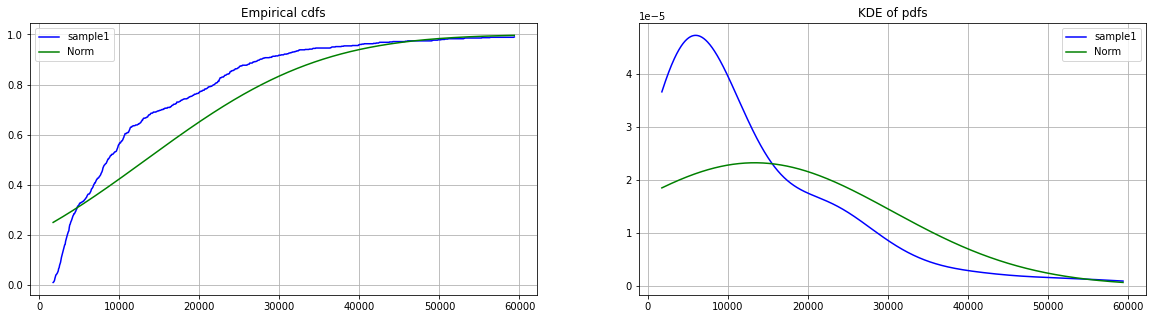

In [87]:
KS_test(uniswap_v2_volume.volumes, norm)